## Decision Tree Regression with Diabetes dataset

In [16]:
from sklearn.datasets import load_diabetes

In [17]:
dataset = load_diabetes()

In [18]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [20]:
import pandas as pd
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [23]:
X = df
y = dataset.target

In [24]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [25]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.171161,0.184695,0.314569,0.270283,0.218952,-0.043783,0.180038,0.268422,0.281806
sex,0.171161,1.000000,0.033934,0.179283,0.021069,0.120205,-0.355094,0.320490,0.113187,0.165951
bmi,0.184695,0.033934,1.000000,0.394309,0.266467,0.261560,-0.354655,0.430974,0.468473,0.404928
bp,0.314569,0.179283,0.394309,1.000000,0.239978,0.161457,-0.120827,0.212785,0.375295,0.374647
s1,0.270283,0.021069,0.266467,0.239978,1.000000,0.891063,0.053003,0.546840,0.528543,0.330773
s2,0.218952,0.120205,0.261560,0.161457,0.891063,1.000000,-0.190658,0.654675,0.307139,0.293291
s3,-0.043783,-0.355094,-0.354655,-0.120827,0.053003,-0.190658,1.000000,-0.736685,-0.372437,-0.288236
s4,0.180038,0.320490,0.430974,0.212785,0.546840,0.654675,-0.736685,1.000000,0.613472,0.431352
s5,0.268422,0.113187,0.468473,0.375295,0.528543,0.307139,-0.372437,0.613472,1.000000,0.478967
s6,0.281806,0.165951,0.404928,0.374647,0.330773,0.293291,-0.288236,0.431352,0.478967,1.000000


<Axes: >

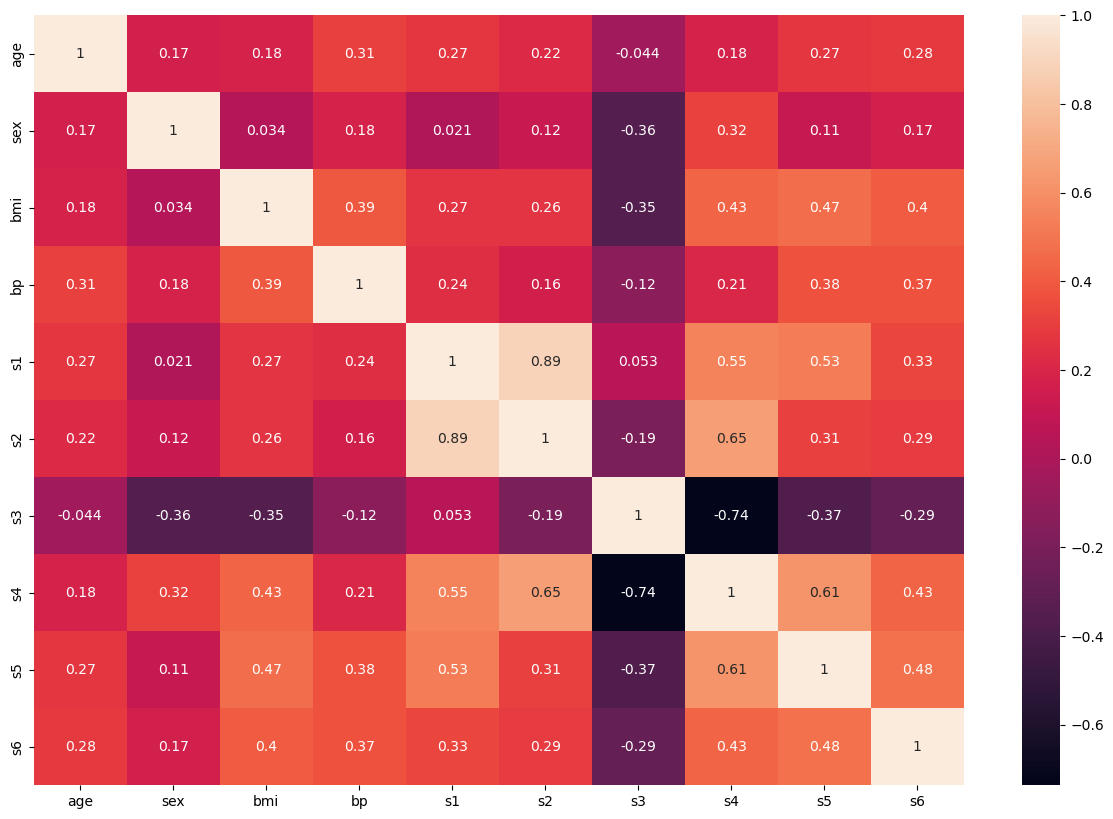

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [ ]:
# Model training

from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

## Hyperparam tuning

In [29]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best'],
    'max_depth':[1,2,3,4,5,10,15,20,25],
    'max_features':['sqrt','log2']
}

In [30]:
from sklearn.model_selection import GridSearchCV

regressor=DecisionTreeRegressor()
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')


In [31]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best']},
             scoring='neg_mean_squared_error')

In [33]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [34]:
y_pred=grid.predict(X_test)

## Model evaluation

In [35]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.38617060570174955
45.54460913887008
3252.161278692162


In [36]:
selectedmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')

selectedmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.5, 0.9, 'x[2] <= -0.012\nfriedman_mse = 6076.398\nsamples = 353\nvalue = 153.737'),
 Text(0.25, 0.7, 'x[8] <= 0.059\nfriedman_mse = 2823.735\nsamples = 148\nvalue = 109.851'),
 Text(0.125, 0.5, 'x[1] <= 0.028\nfriedman_mse = 2698.561\nsamples = 144\nvalue = 107.965'),
 Text(0.0625, 0.3, 'x[7] <= -0.06\nfriedman_mse = 2694.608\nsamples = 78\nvalue = 115.859'),
 Text(0.03125, 0.1, 'friedman_mse = 1152.381\nsamples = 17\nvalue = 99.176'),
 Text(0.09375, 0.1, 'friedman_mse = 3025.234\nsamples = 61\nvalue = 120.508'),
 Text(0.1875, 0.3, 'x[5] <= -0.087\nfriedman_mse = 2542.565\nsamples = 66\nvalue = 98.636'),
 Text(0.15625, 0.1, 'friedman_mse = 0.0\nsamples = 1\nvalue = 77.0'),
 Text(0.21875, 0.1, 'friedman_mse = 2574.368\nsamples = 65\nvalue = 98.969'),
 Text(0.375, 0.5, 'x[1] <= 0.016\nfriedman_mse = 2591.688\nsamples = 4\nvalue = 177.75'),
 Text(0.3125, 0.3, 'x[0] <= -0.023\nfriedman_mse = 462.25\nsamples = 2\nvalue = 130.5'),
 Text(0.28125, 0.1, 'friedman_mse = 0.0\nsamples = 1\

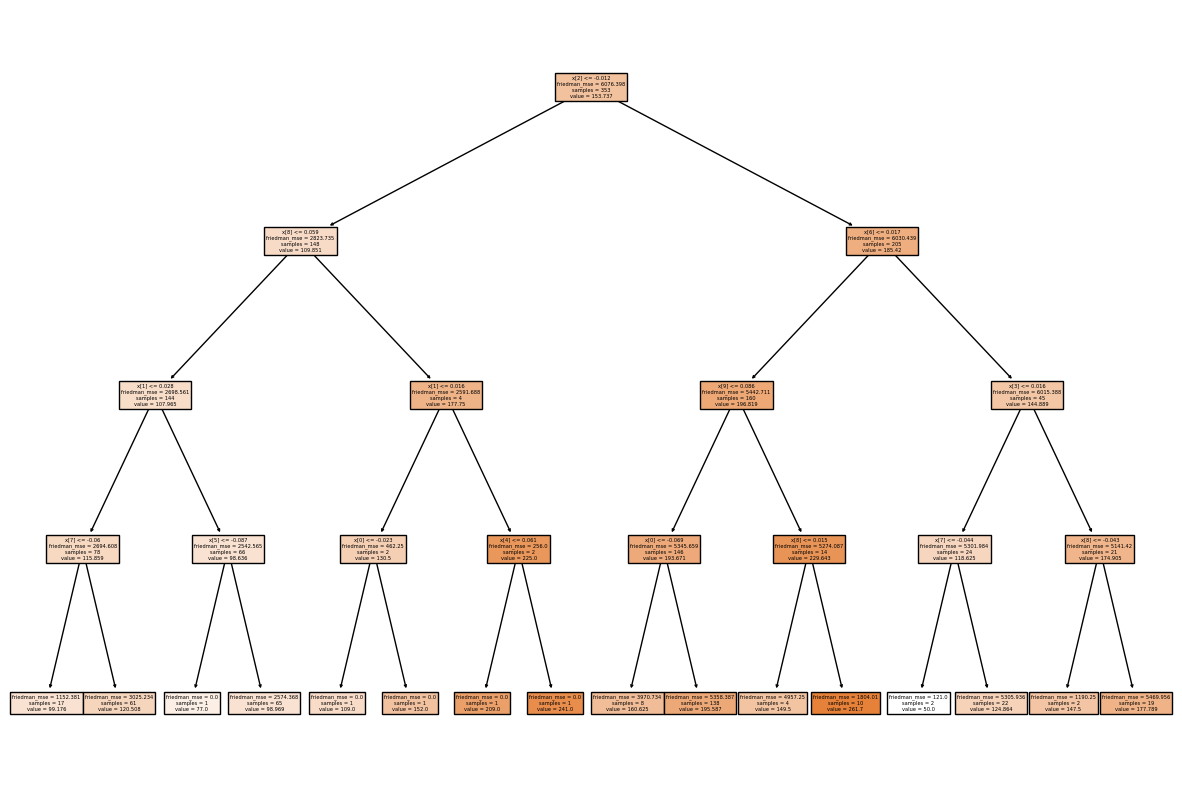

In [ ]:
##Visualize the Decision Tree

import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)